# Chapter 03. Sampling the Imaginary

#### Chapter Code

In [12]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
np.set_printoptions(suppress=True)

**Code 3.1**

\begin{equation*}
P(Vampire|+) = \frac{P(+|Vampire) * P(Vampire)} {P(+)}
\end{equation*}

In [4]:
p_positive_given_vampire = .95
p_positive_given_mortal = .01
p_vampire = .001

p_positive = p_positive_given_vampire*p_vampire + p_positive_given_mortal*(1-p_vampire)

p_vampire_given_positive = p_positive_given_vampire * p_vampire / p_positive
p_vampire_given_positive

0.08683729433272395

#### 3.1 Sampling from a grid-approximate posterior.

Here's a reminder for how to compute the posterior for the globe-tossing model, using grid-approximation. Remember, the *posterior* here means the probability of `p` conditional on the data.

**Code 3.2**

In [9]:
n_points = 1000
n_success = 6
n_trials = 9

# Define the grid.
p_grid = np.linspace(0, 1, n_points)
# Define the prior.
# For a uniform prior.
prior = np.repeat(1, n_points)
# Compute the likelihood at each parameter value.
likelihood = stats.binom.pmf(n_success, n_trials, p_grid)
# Compute the unstandardized posterior at each parameter value.
posterior_unstd = likelihood * prior
# Standardize the posterior.
posterior = posterior_unstd / np.sum(posterior_unstd)

Now we wish to draw 10,000 samples from this posterior. Imagine the posterior is a bucket full of parameter values, numbers such as 0.1, 0.7, 0.5, 1, etc. Within the bucket, each value exists in proportion to its posterior probability, such that values near the peak are much more common than those in the tails. We're going to scoop out 10,000 values from the bucket. Provided the bucket is well-mixed, the resulting samples will have the same proportions as the exact posterior density. Therefore, individual values of `p` will appear in our samples in proportion to the posterior probability of each value. 

**Code 3.3**

In [11]:
samples = np.random.choice(p_grid, size=10000, replace=True, p=posterior)

**Code 3.4**

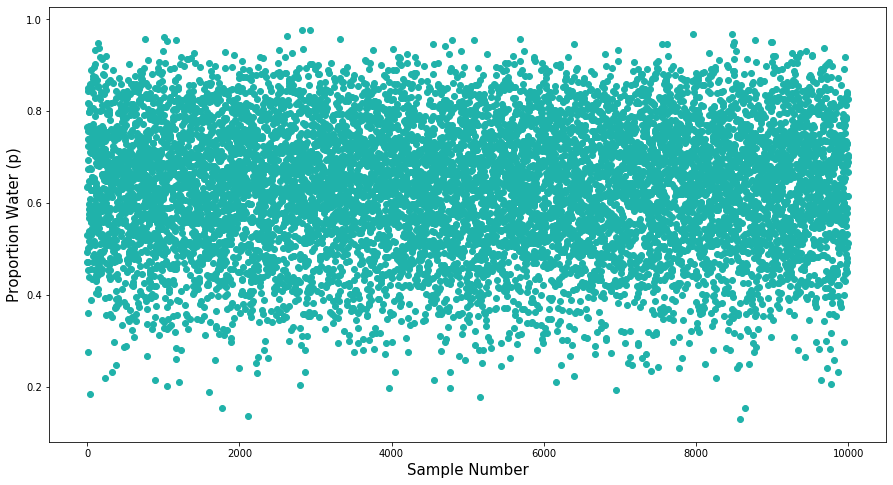

In [24]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.scatter(x=range(len(samples)), y=samples, color='lightseagreen')
ax.set_xlabel('Sample Number', fontsize=15)
ax.set_ylabel('Proportion Water (p)', fontsize=15);

In this plot, it's as if you are flying over the posterior distribution, looking down on it. There are many more samples from the dense region near 0.6 and very few samples below 0.25. The below chart shows the `density estimate` computed from these samples. 

**Code 3.5**

#### 3.2 Sampling to summarize

Once your model produces a posterior distribution, the model's work is done. But your work has just begun. It is necessary to summarize and interpret the posterior distribution. Exactly how it is summarized depends on your purpose. But common questions include:

* How much posterior probability lies below some parameter value? 
* How much posterior probability lies between some parameter values?
* Which parameter value marks the lower 5% of posterior probability? 
* Which range of parameter values contains 90% of the posterior probability?
* Which parameter value has the highest posterior probability?

These simple questions can be divided into questions about: 

1. Intervals of `defined boundries`
2. Questions about intervals of `defined probability mass`
3. Questions about `point estimates`